In [24]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps
from scipy.stats import pareto
import math 
import statistics 


In [25]:
n = 100
teta = 5

In [26]:
x = pareto.rvs(b=teta-1, size=n)

def teta_est(x):
    return n/sum(np.log(x)) + 1
    
teta_e = teta_est(x)

# Доверительный интервал для медианы(ОМП)

In [27]:
t1_m_as = ((-1.96) * 2**(1/(teta_e-1)) * np.log(2)) / ((teta_e-1) * n**0.5) + 2**(1/(teta_e-1))
t2_m_as = (1.96 * 2**(1/(teta_e-1)) * np.log(2)) / ((teta_e-1) * n**0.5) + 2**(1/(teta_e-1))
print(f'Доверительный интервал для медианы(ОМП) = ({t1_m_as}, {t2_m_as})')


Доверительный интервал для медианы(ОМП) = (1.146912077655985, 1.2265567958112908)


# Асимптотический доверительный интервал для teta

In [28]:
t1_as_teta= teta_e - 1.96*(teta_e - 1)/(n**0.5)
t2_as_teta = teta_e + 1.96*(teta_e - 1)/(n**0.5)
print(f'Асимптотический доверительный интервал для teta(ОМП) = ({t1_as_teta}, {t2_as_teta})')


Асимптотический доверительный интервал для teta(ОМП) = (4.255098552927793, 5.842161528982139)


# Bootstrap

In [29]:
delta = np.array([])
teta_boot = np.array([])

for i in range(0,1000):
    bt = np.random.choice(x, size = x.shape[0]).round(2) 
    delta = np.append(delta, teta_est(bt) - teta_e)
    

delta.sort() 
t1_bt, t2_bt = teta_e - delta[975], teta_e - delta[25]

In [30]:
print(f'Бутстраповский(непараметрический) интервал для teta : ({t1_bt}, {t2_bt}) реальная teta: {teta}')


Бутстраповский(непараметрический) интервал для teta : (3.995421820447091, 5.864009010381447) реальная teta: 5


# Parametric Bootstrap

In [31]:
delta_par = np.array([])

for i in range(70000):
    bt_par = pareto.rvs(b = teta-1, size=n)
    delta_par = np.append(delta_par, teta_est(bt_par) - teta_e)

delta_par.sort() 

t1_bt_par, t2_bt_par = teta_e - delta_par[int(delta_par.shape[0]*0.975)], teta_e - delta_par[int(delta_par.shape[0]*0.025)]

In [32]:
print(f'Бутстраповский(параметрический) интервал для teta : ({t1_bt_par}, {t2_bt_par}) реальная teta: {teta}')

Бутстраповский(параметрический) интервал для teta : (4.186610802213116, 5.777399061600406) реальная teta: 5


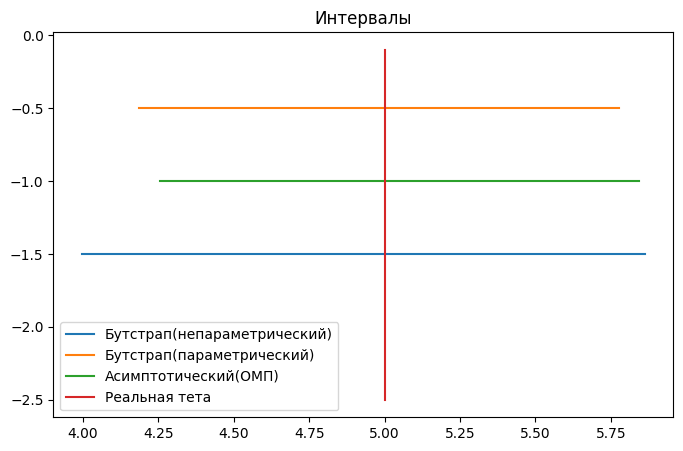

In [33]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot([t1_bt, t2_bt], [-1.5, -1.5], label = 'Бутстрап(непараметрический)')
ax.plot([t1_bt_par, t2_bt_par], [-0.5, -0.5], label = 'Бутстрап(параметрический)')
ax.plot([t1_as_teta, t2_as_teta], [-1, -1], label = 'Асимптотический(ОМП)')

ax.plot([teta, teta], [-2.5,-0.1], label = 'Реальная тета')


ax.set_title('Интервалы')    

ax.legend()